Version Python 3.9.12

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
warnings.warn('DelftStack')
warnings.warn('Do not show this message')

In [14]:
df = pd.read_csv('embauche.csv')

In [3]:
df.head()

,Unnamed: 0,index,date,cheveux,age,exp,salaire,sexe,diplome,specialite,note,dispo,embauche
0,0,0,2012-06-02,roux,25.0,9.0,26803.0,F,licence,geologie,97.08,non,0
1,1,1,2011-04-21,blond,35.0,13.0,38166.0,M,licence,forage,63.86,non,0
2,2,2,2012-09-07,blond,29.0,13.0,35207.0,M,licence,geologie,78.50,non,0
3,3,3,2011-07-01,brun,NaN,12.0,32442.0,M,licence,geologie,45.09,non,0
4,4,4,2012-08-07,roux,35.0,6.0,28533.0,F,licence,detective,81.91,non,0


In [24]:
df.describe()

,age,exp,salaire,note
count,19034.000000,19902.000000,19905.000000,19886.000000
mean,35.951665,9.501457,34974.343934,75.168762
std,8.694272,3.010237,5003.099616,17.095926
min,19.000000,0.000000,14128.000000,8.680000
25%,30.000000,7.000000,31596.000000,63.720000
50%,35.000000,9.000000,34979.000000,75.080000
75%,42.000000,12.000000,38358.000000,86.617500
max,74.000000,23.000000,53977.000000,143.220000


In [15]:
df.dtypes

Unnamed: 0      int64
index           int64
date           object
cheveux        object
age           float64
exp           float64
salaire       float64
sexe           object
diplome        object
specialite     object
note          float64
dispo          object
embauche        int64
dtype: object

In [6]:
df.shape

(20000, 13)

### Nettoyage des données

In [16]:
df['date'] = pd.to_datetime(df['date']) 

In [17]:
del df['Unnamed: 0'] 

In [18]:
del df['index']

In [10]:
df['cheveux'].unique()

array(['roux', 'blond', 'brun', 'chatain', nan], dtype=object)

In [322]:
df['age'].unique()

array([25., 35., 29., nan, 37., 33., 31., 43., 28., 50., 44., 39., 23.,
       38., 30., 42., 27., 19., 40., 49., 26., 59., 41., 34., 24., 16.,
       36., 48., 47., 53., 20., 22., 54., 46., 45., 61., 21., 56., 14.,
       32., 55., 52., 65., 10., 51., 17., 12., 13.,  8., 15., 57., 62.,
       18., 58.,  5., 67., 63.,  6.,  9., 11.,  3., -1., 69., 64.,  4.,
       60.,  2.,  7., -3., 72., 66., 71.,  0., 74.,  1., 68., -2.])

In [19]:
for i in range(-3,19):
    df.loc[df.age == i, ['age']] = np.nan

In [324]:
df['exp'].unique()

array([ 9., 13., 12.,  6.,  8., 10., 11.,  4., 14.,  3.,  7., 15.,  5.,
       16.,  2., 17.,  0., nan,  1., 21., 18., 19., 20., -1., 23., -2.])

In [20]:
df.loc[df.exp == -1, ['exp']] = np.nan
df.loc[df.exp == -2, ['exp']] = np.nan

In [326]:
df['sexe'].unique()

array(['F', 'M', nan], dtype=object)

In [327]:
df['diplome'].unique()

array(['licence', 'master', 'doctorat', 'bac', nan], dtype=object)

In [328]:
df['dispo'].unique()

array(['non', 'oui', nan], dtype=object)

In [329]:
df['embauche'].unique()

array([0, 1], dtype=int64)

In [21]:
df['embauche'] = df['embauche'].astype('object')

In [25]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=False)

age           0.04830
note          0.00570
diplome       0.00550
dispo         0.00530
cheveux       0.00515
sexe          0.00500
exp           0.00490
salaire       0.00475
specialite    0.00465
date          0.00455
embauche      0.00000
dtype: float64

In [26]:
df = df.dropna()

In [28]:
df

,date,cheveux,age,exp,salaire,sexe,diplome,specialite,note,dispo,embauche
0,2012-06-02,roux,25.0,9.0,26803.0,F,licence,geologie,97.08,non,0
1,2011-04-21,blond,35.0,13.0,38166.0,M,licence,forage,63.86,non,0
2,2012-09-07,blond,29.0,13.0,35207.0,M,licence,geologie,78.50,non,0
4,2012-08-07,roux,35.0,6.0,28533.0,F,licence,detective,81.91,non,0
5,2014-02-12,chatain,37.0,8.0,38558.0,M,master,geologie,63.46,non,1
...,...,...,...,...,...,...,...,...,...,...,...
19995,2012-03-10,roux,47.0,9.0,35723.0,M,licence,geologie,66.47,non,0
19996,2010-09-19,chatain,38.0,10.0,33570.0,F,master,geologie,62.29,non,1
19997,2010-09-02,chatain,23.0,6.0,33751.0,F,doctorat,detective,103.48,oui,0
19998,2011-12-06,chatain,33.0,11.0,34167.0,F,licence,detective,73.35,non,0


## Lien éventuel entre les différentes variables de notre jeu de données

In [27]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2, f_classif
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import pearsonr

In [333]:
def graphique(num,variable_cible) :
    # entrée : num (numéro de la colonne de la variable qualitative étudiée), variable qualitative cible
    # sortie : effectif de chaque modalité
    return pd.crosstab(data[data.columns[num]].astype("category"),data[variable_cible].astype("category")).plot(
                       kind='bar',ylabel ='effectif') 

### a. Spécialité - Sexe 

<AxesSubplot:xlabel='sexe', ylabel='effectif'>

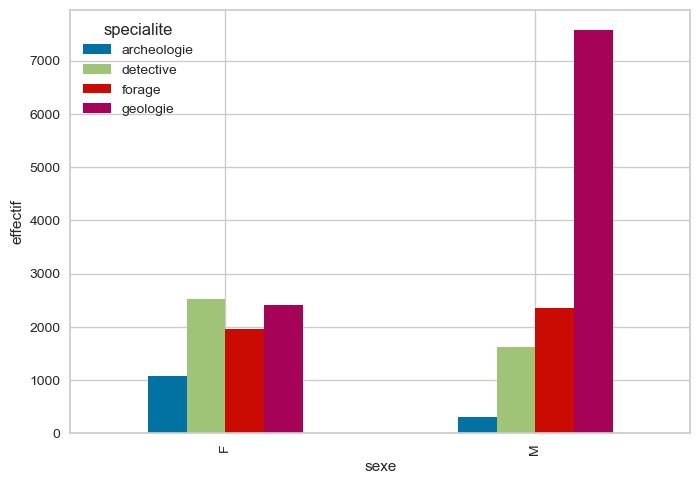

In [334]:
graphique(6,'specialite')

In [335]:
cont = df[['sexe', 'specialite']].pivot_table(index='sexe', columns='specialite', aggfunc=len).fillna(0).copy().astype(int)
cont

specialite,archeologie,detective,forage,geologie
sexe,,,,
F,993,2296,1819,2228
M,265,1466,2171,6950


In [336]:
st_chi2, st_p, st_dof, st_exp = stats.chi2_contingency(cont)
st_p

0.0

### b. Couleur de cheveux - Salaire  

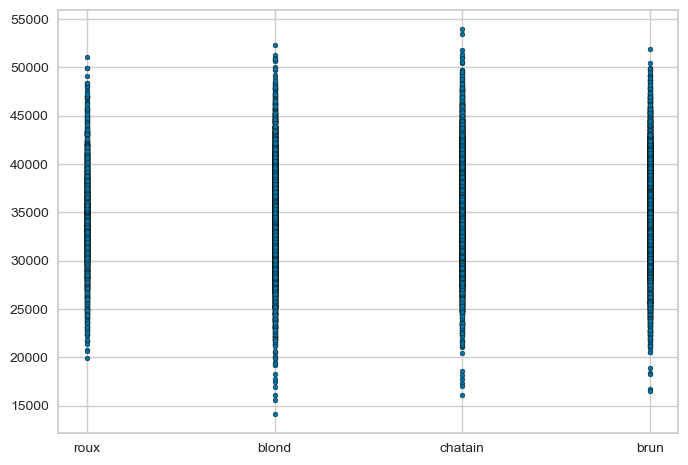

In [337]:
plt.scatter(df.cheveux, df.salaire, edgecolor='k', marker='.')

In [338]:
groupe_1 = df[df['cheveux'] == 'roux']
groupe_2 = df[df['cheveux'] == 'blond']
groupe_3 = df[df['cheveux'] == 'chatain']
groupe_4 = df[df['cheveux'] == 'brun']

In [339]:
stats.kruskal(groupe_1.salaire,groupe_2.salaire,groupe_3.salaire,groupe_4.salaire)

KruskalResult(statistic=72.43909947335554, pvalue=1.2818931281125641e-15)

### c. Année d'expérience - Note à l'exercice

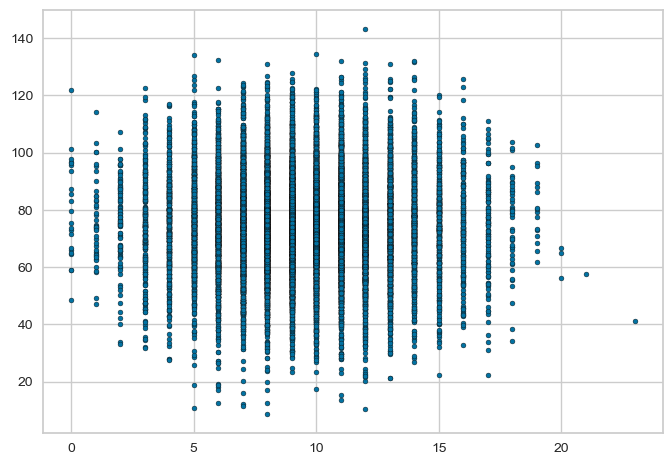

In [340]:
plt.scatter(df.exp, df.note, edgecolor='k', marker='.')

In [341]:
groupe_1 = df[(df['exp'] > 0)  & (df['exp'] <= 5)]
groupe_2 = df[(df['exp'] > 5)  & (df['exp'] <= 10)]
groupe_3 = df[(df['exp'] > 10) & (df['exp'] <= 15)]
groupe_4 = df[(df['exp'] > 15) & (df['exp'] <= 20)]

In [342]:
stats.kruskal(groupe_1.note,groupe_2.note,groupe_3.note,groupe_4.note)

KruskalResult(statistic=3.0044587274934984, pvalue=0.39093823892622664)

## Machine Learning

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from yellowbrick.classifier import ROCAUC
from yellowbrick.model_selection import LearningCurve 
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

def encodage(df):
    enconder =  LabelEncoder()
    for colonnes in df.select_dtypes('object').columns:
        df[colonnes] = enconder.fit_transform(df[colonnes])
    return df

def evaluation(model) :
    model = model.fit(X = X_train,y = y_train)
    ypred = model.predict(X_test)
    print("matrice de confusion ",confusion_matrix(y_test,ypred), sep="\n")
    print("rapport de classification ", classification_report(y_test,ypred),sep="\n")


def graphiqueModel(model):
    visualizer = ROCAUC(model, classes=["0", "1"])
    visualizer.fit(X_train, y_train)        
    visualizer.score(X_test, y_test)        
    visualizer.show()

In [30]:
df = encodage(df)

In [31]:
X = df.iloc[:,1:-1]
y = df.embauche

In [35]:
y.value_counts()

0    16115
1     2073
Name: embauche, dtype: int64

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [33]:
Xgboost = XGBClassifier()

In [34]:
evaluation(Xgboost)

matrice de confusion 
[[4737   94]
 [ 365  261]]
rapport de classification 
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      4831
           1       0.74      0.42      0.53       626

    accuracy                           0.92      5457
   macro avg       0.83      0.70      0.74      5457
weighted avg       0.91      0.92      0.91      5457



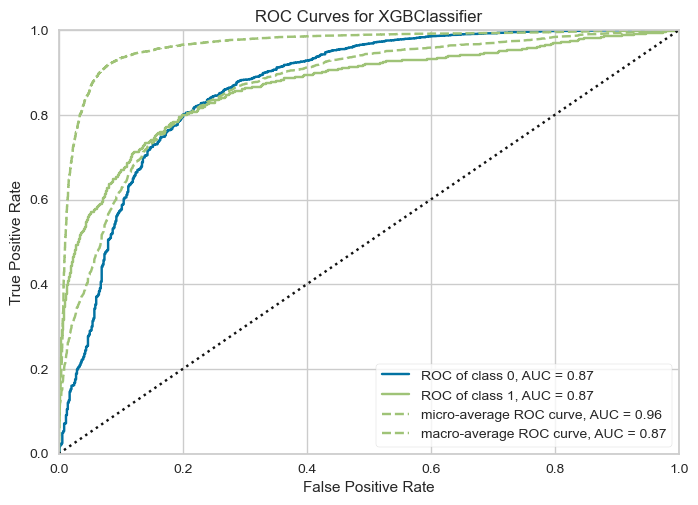

In [430]:
graphiqueModel(Xgboost)

Text(0.5, 1.0, 'importance des variables pour Xgboost Classifier')

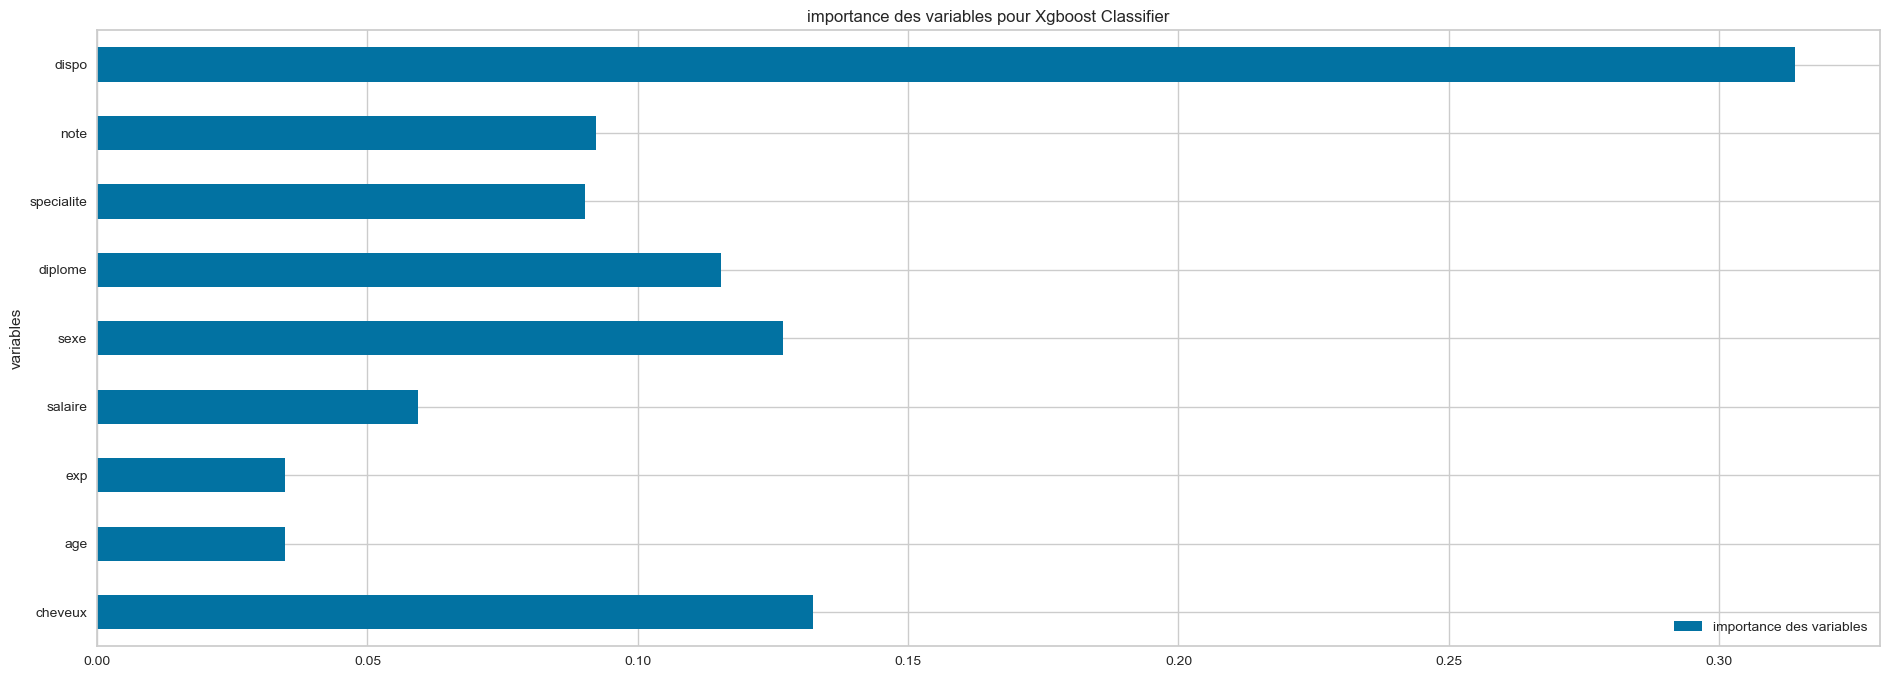

In [431]:
fig, ax = plt.subplots(figsize=(23,8))
(pd.DataFrame({"variables" : X_train.columns, "importance des variables" : Xgboost.feature_importances_})
.set_index("variables")
.plot.barh(ax=ax)
)
plt.title("importance des variables pour Xgboost Classifier")